# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [53]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [54]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 601


In [55]:
#Set units for search
units = "metric"

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [56]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        weather_response = requests.get(city_url)
        city_weather = weather_response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | gaigeturi
Processing Record 2 of Set 1 | margate
Processing Record 3 of Set 1 | puerto natales
Processing Record 4 of Set 1 | hayma'
City not found. Skipping...
Processing Record 5 of Set 1 | grytviken
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | port mathurin
Processing Record 8 of Set 1 | harnai
Processing Record 9 of Set 1 | waitangi
Processing Record 10 of Set 1 | terra santa
Processing Record 11 of Set 1 | afaahiti
Processing Record 12 of Set 1 | north bondi
Processing Record 13 of Set 1 | jining
Processing Record 14 of Set 1 | hawaiian paradise park
Processing Record 15 of Set 1 | hermanus
Processing Record 16 of Set 1 | ribeira grande
Processing Record 17 of Set 1 | happy valley-goose bay
Processing Record 18 of Set 1 | fale old settlement
Processing Record 19 of Set 1 | albany
Processing Record 20 of Set 1 | tura
Processing Record 21 of Set 1 | adamstown

In [57]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame.from_dict(city_data)

# Show Record Count
city_data_df.count()

City          580
Lat           580
Lng           580
Max Temp      580
Humidity      580
Cloudiness    580
Wind Speed    580
Country       580
Date          580
dtype: int64

In [58]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,gaigeturi,33.4644,126.3183,29.20,72,43,0.80,KR,1723853343
1,margate,51.3813,1.3862,15.94,88,92,3.77,GB,1723853343
2,puerto natales,-51.7236,-72.4875,0.36,93,75,2.18,CL,1723853343
3,grytviken,-54.2811,-36.5092,-3.67,53,0,1.10,GS,1723853344
4,port-aux-francais,-49.3500,70.2167,1.23,68,56,16.34,TF,1723853344


In [59]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [60]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,gaigeturi,33.4644,126.3183,29.20,72,43,0.80,KR,1723853343
1,margate,51.3813,1.3862,15.94,88,92,3.77,GB,1723853343
2,puerto natales,-51.7236,-72.4875,0.36,93,75,2.18,CL,1723853343
3,grytviken,-54.2811,-36.5092,-3.67,53,0,1.10,GS,1723853344
4,port-aux-francais,-49.3500,70.2167,1.23,68,56,16.34,TF,1723853344


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

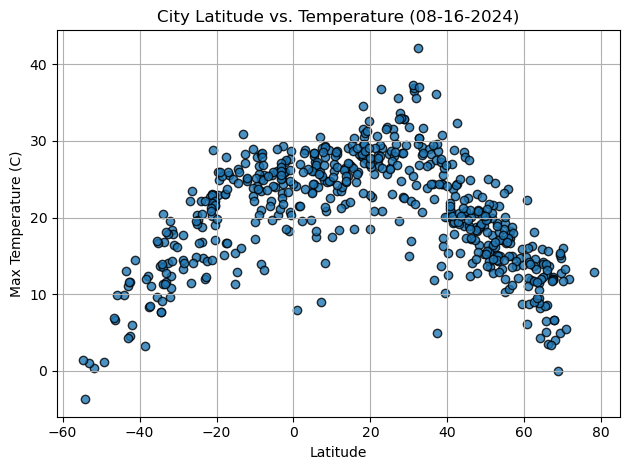

In [61]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], alpha=.8, edgecolors="k")

#Format date
date = datetime.now()
date = date.strftime("%m-%d-%Y")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title(f"City Latitude vs. Temperature ({date})")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

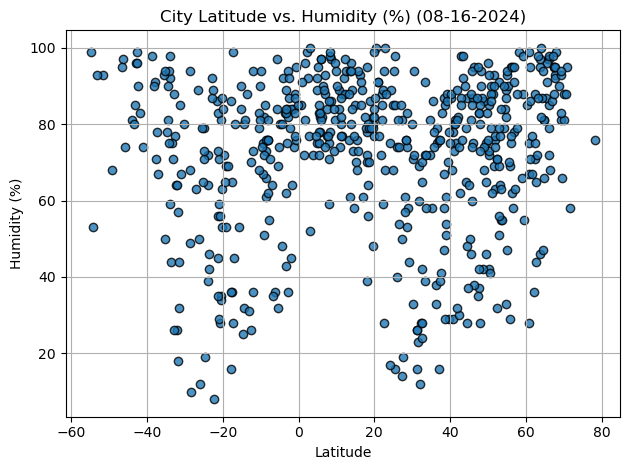

In [62]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], alpha=.8, edgecolors="k")

#Format date from UTC to m/d/y
date = datetime.now()
date = date.strftime("%m-%d-%Y")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity (%) ({date})")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

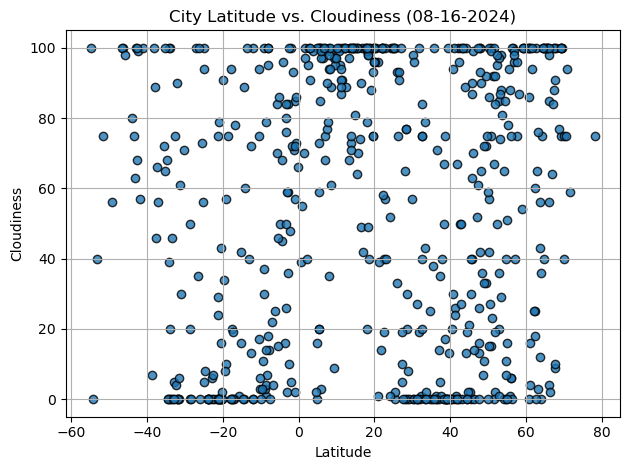

In [63]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], alpha=.8, edgecolors="k")

#Format date from UTC to m/d/y
date = datetime.now()
date = date.strftime("%m-%d-%Y")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

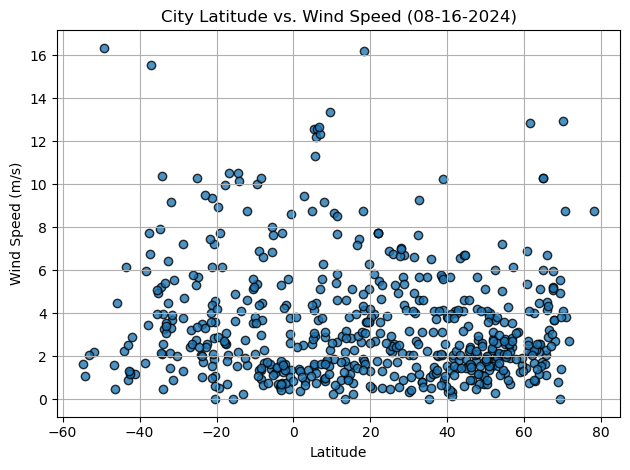

In [64]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], alpha=.8, edgecolors="k")

#Format date from UTC to m/d/y
date = datetime.now()
date = date.strftime("%m-%d-%Y")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [65]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) > 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,gaigeturi,33.4644,126.3183,29.20,72,43,0.80,KR,1723853343
1,margate,51.3813,1.3862,15.94,88,92,3.77,GB,1723853343
6,harnai,30.1005,67.9374,26.14,71,98,0.35,PK,1723853344
11,jining,35.4050,116.5814,26.96,86,38,1.01,CN,1723853344
12,hawaiian paradise park,19.5933,-154.9731,27.63,80,100,5.14,US,1723853345


In [66]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,puerto natales,-51.7236,-72.4875,0.36,93,75,2.18,CL,1723853343
3,grytviken,-54.2811,-36.5092,-3.67,53,0,1.10,GS,1723853344
4,port-aux-francais,-49.3500,70.2167,1.23,68,56,16.34,TF,1723853344
5,port mathurin,-19.6833,63.4167,22.92,72,34,8.96,MU,1723853344
7,waitangi,-43.9535,-176.5597,9.90,81,80,2.24,NZ,1723853344


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.6835036249430744
-----------------------------------
Observations about linear relationship:
The regression displays a negative relationship between temperature and latitude
In the northern hemisphere, as the latitude increases the distance from the equator increases
As you move away from the equator, the max temperature decreases.


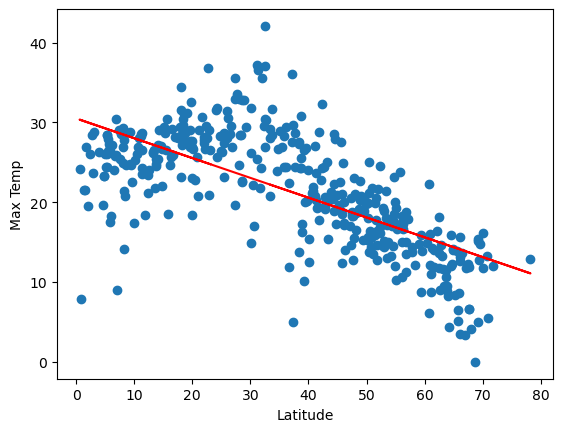

In [67]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(0,-20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f'The r-value is {rvalue}')
print("-----------------------------------")
print("Observations about linear relationship:")
print("The regression displays a negative relationship between temperature and latitude")
print("In the northern hemisphere, as the latitude increases the distance from the equator increases")
print("As you move away from the equator, the max temperature decreases.")

The r-value is 0.8148531846961148
-----------------------------------
Observations about linear relationship:
The regression displays a sligtly positive relationship between temperature and latitude.
In the southern hemisphere, as the latitude increases the distance from the equator decreases
As you move closer to the equator, the max temperature generally increases.


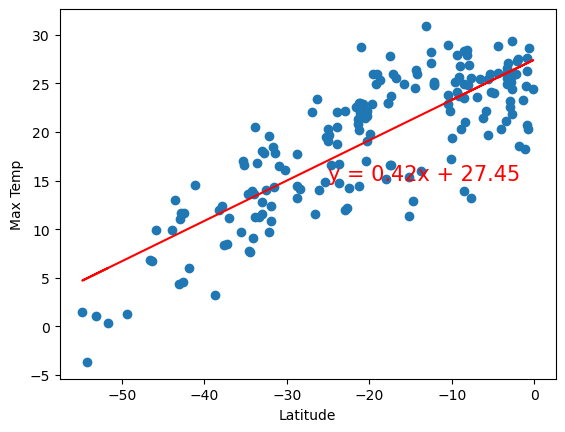

In [68]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-25,15),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f'The r-value is {rvalue}')
print("-----------------------------------")
print("Observations about linear relationship:")
print("The regression displays a sligtly positive relationship between temperature and latitude.")
print("In the southern hemisphere, as the latitude increases the distance from the equator decreases")
print("As you move closer to the equator, the max temperature generally increases.")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is -0.04266146048987498
-----------------------------------
Observations about linear relationship:
The relationship is slightly negative, though there doesn't appear to be a strong correlation between humidity and latitude.


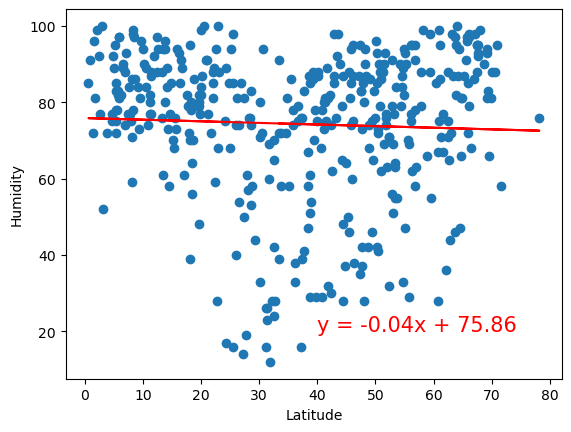

In [69]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f'The r-value is {rvalue}')
print("-----------------------------------")
print("Observations about linear relationship:")
print("The relationship is slightly negative, though there doesn't appear to be a strong correlation between humidity and latitude.")

The r-value is -0.063067965187454
-----------------------------------
Observations about linear relationship:
The relationship is slightly positive.
Humidity increases as cities get closer to the equator.


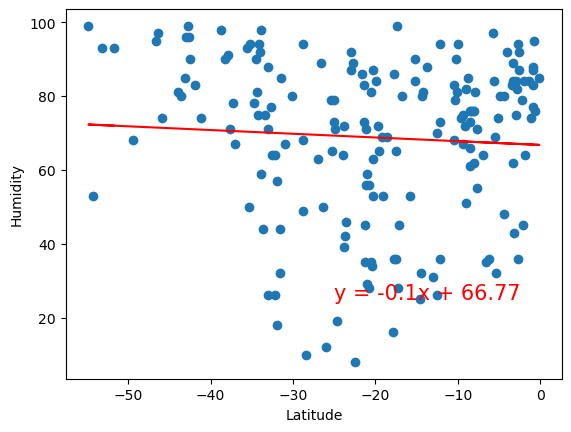

In [70]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-25,25),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f'The r-value is {rvalue}')
print("-----------------------------------")
print("Observations about linear relationship:")
print("The relationship is slightly positive.")
print("Humidity increases as cities get closer to the equator.")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is -0.16424734473514838
-----------------------------------
Observations about linear relationship:
There seem to be a negative correlation between latitude and cloudiness.


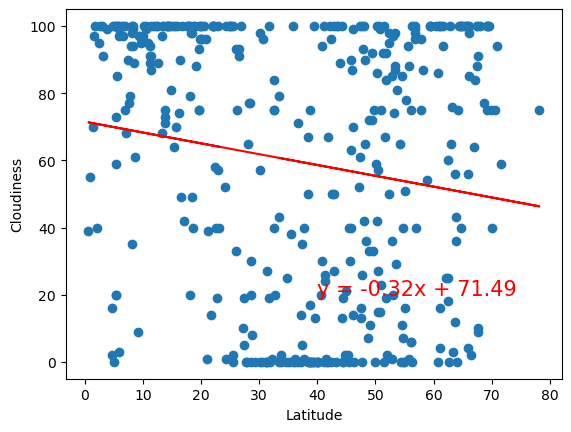

In [71]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f'The r-value is {rvalue}')
print("-----------------------------------")
print("Observations about linear relationship:")
print("There seem to be a negative correlation between latitude and cloudiness.")

The r-value is -0.06840945144177837
-----------------------------------
Observations about linear relationship:
There seem to be a slight negative correlation between latitude and cloudiness.


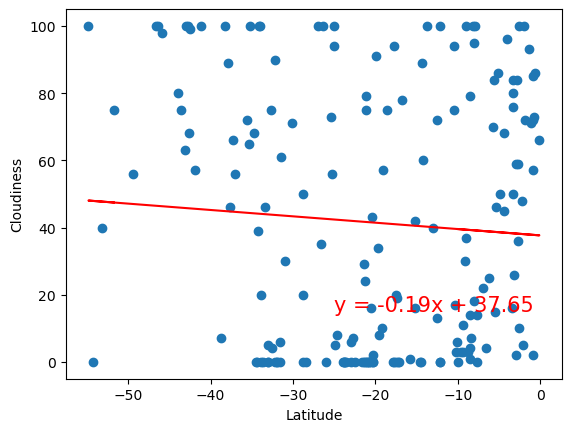

In [72]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-25,15),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f'The r-value is {rvalue}')
print("-----------------------------------")
print("Observations about linear relationship:")
print("There seem to be a slight negative correlation between latitude and cloudiness.")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is -0.09163974393376412
-----------------------------------
Observations about linear relationship:
There does not appear to be a correlation between latitude and wind speed.


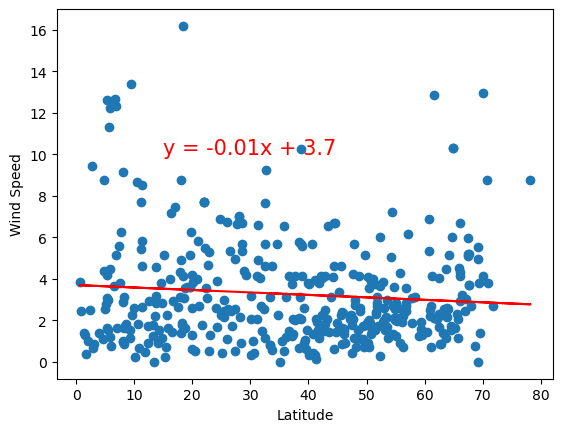

In [73]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(15,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f'The r-value is {rvalue}')
print("-----------------------------------")
print("Observations about linear relationship:")
print("There does not appear to be a correlation between latitude and wind speed.")

The r-value is -0.1134718479797071


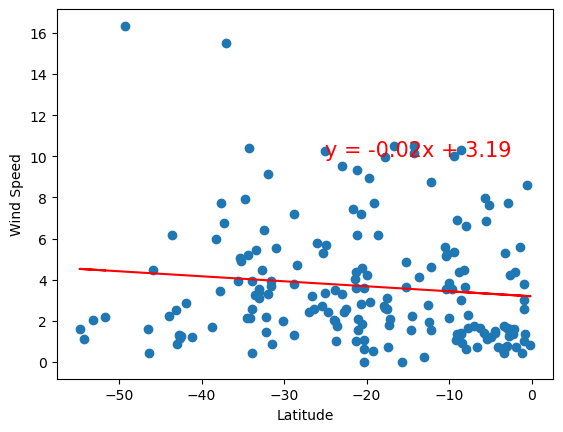

In [74]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-25,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f'The r-value is {rvalue}')


**Discussion about the linear relationship: the linear gragh is showing that that there is no obvious correlation between the latitude and the wind speed